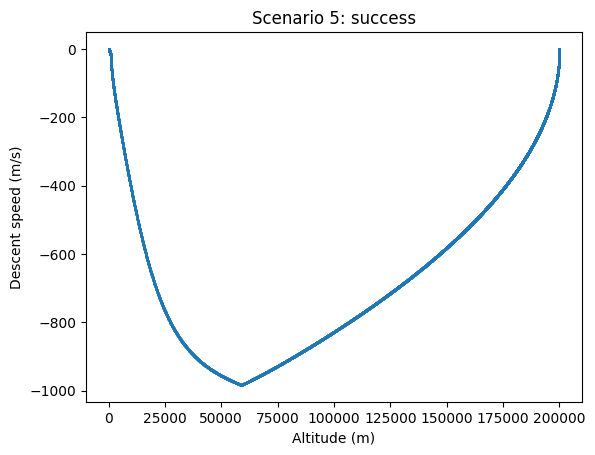

In [36]:
import matplotlib.pyplot as plt
h, hf = [], []
v, vf = [], []
with open("traj.txt") as file:
    lines = list(file.readlines())
    for i, l in enumerate(lines):
        if l[0] == 'S':
            continue
        if True:
            f, x, y = l.split(" ")
            if f[0] == 'n':
                hf.append(float(x))
                vf.append(float(y))
            else:
                h.append(float(x))
                v.append(float(y))
plt.scatter(h, v, s = 5, marker='.')
plt.title("Scenario 5: success")
plt.ylabel("Descent speed (m/s)")
plt.xlabel("Altitude (m)")
plt.show()

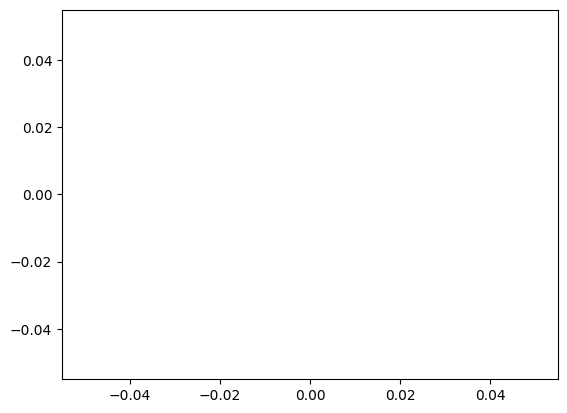

In [2]:
import matplotlib.pyplot as plt
plt.scatter(h, v, s = 5)

## Generation time

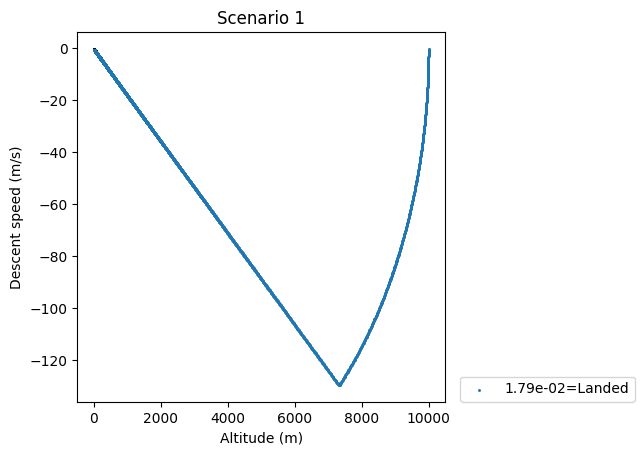

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from os import system
for k_h in [1/56]:
    h, hf = [], []
    v, vf = [], []
    
    system(f"make -j clean > /dev/null")
    system(f'make -j lander K_h="-DK_h={k_h}" SCENARIO="-DSCENARIO1" > /dev/null')
    system(f"xvfb-run ./lander > traj.txt")

    with open("traj.txt") as file:
        lines = list(file.readlines())
        landed = 0
        for l in lines:
            if l[0] == 'S':
                continue
            f, x, y = l.split(" ")
            if l[0] == 'o':
                continue
            if f[0] == 'n':
                h.append(float(x))
                v.append(float(y))
            elif f[0] == 'c':
                if x[0] == "1":
                    landed = "Crashed"
                else:
                    landed = "Landed"
            else:
                h.append(float(x))
                v.append(float(y))
    plt.scatter(h,[j if j > v[i] else v[i] for i,j in enumerate(-(0.5 + k_h*np.array(h)))], s=1, color='black', marker='.')
    plt.scatter(h, v, s = 5, label=f"{k_h:.2e}={landed}", marker='.')
    
plt.subplots_adjust(right=0.7)
plt.legend(loc=(1.04, 0))
plt.title(f"Scenario 1")
plt.ylabel("Descent speed (m/s)")
plt.xlabel("Altitude (m)")
plt.show()

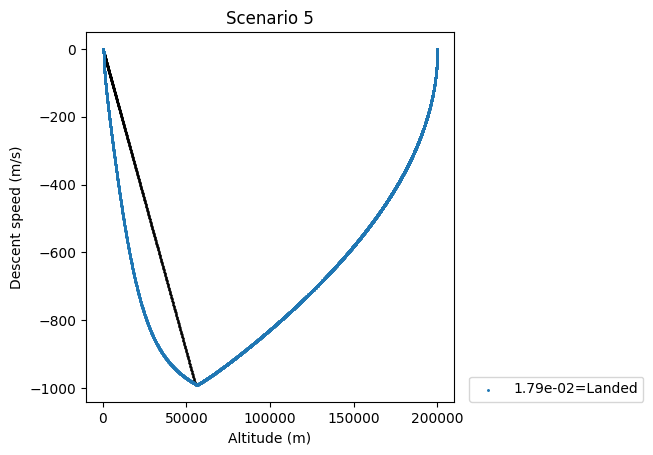

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from os import system
for k_h in [1/56]:
    h, hf = [], []
    v, vf = [], []
    
    system(f"make -j clean > /dev/null")
    system(f'make -j lander K_h="-DK_h={k_h}" SCENARIO="-DSCENARIO5" > /dev/null')
    system(f"xvfb-run ./lander > traj.txt")

    with open("traj.txt") as file:
        lines = list(file.readlines())
        landed = 0
        for l in lines:
            if l[0] == 'S':
                continue
            if l[0] == 'o':
                continue
            f, x, y = l.split(" ")
            if f[0] == 'n':
                h.append(float(x))
                v.append(float(y))
            elif f[0] == 'c':
                if x[0] == "1":
                    landed = "Crashed"
                else:
                    landed = "Landed"
            else:
                h.append(float(x))
                v.append(float(y))
    plt.scatter(h,[j if j > v[i] else v[i] for i,j in enumerate(-(0.5 + k_h*np.array(h)))], s=1, color='black', marker='.')
    plt.scatter(h, v, s = 5, label=f"{k_h:.2e}={landed}", marker='.')

plt.subplots_adjust(right=0.7)
plt.legend(loc=(1.04, 0))
plt.title(f"Scenario 5")
plt.ylabel("Descent speed (m/s)")
plt.xlabel("Altitude (m)")
plt.show()

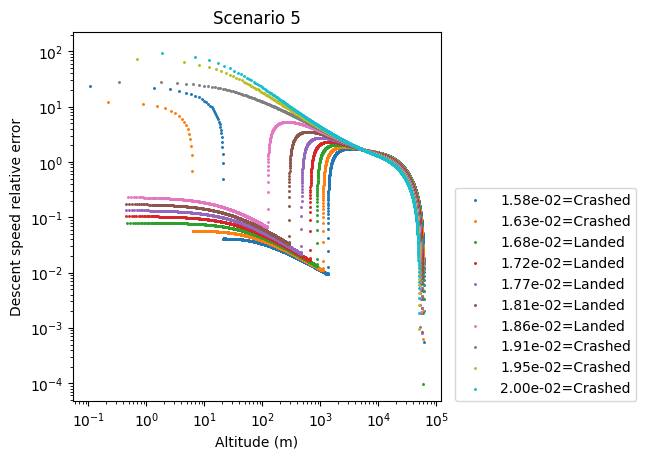

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from os import system
for k_h in np.linspace(0.95/60, 1.20/60, 10):
    h, hf = [], []
    v, vf = [], []
    
    system(f"make -j clean > /dev/null")
    system(f'make -j lander K_h="-DK_h={k_h}" SCENARIO="-DSCENARIO5" > /dev/null')
    system(f"xvfb-run ./lander > traj.txt")

    with open("traj.txt") as file:
        lines = list(file.readlines())
        landed = 0
        for l in lines:
            if l[0] == 'S':
                continue
            f, x, y = l.split(" ")
            if f[0] == 'n':
                h.append(float(x))
                v.append(float(y))
            elif f[0] == 'c':
                if x[0] == "1":
                    landed = "Crashed"
                else:
                    landed = "Landed"
            else:
                h.append(float(x))
                v.append(float(y))
    plt.scatter(*list(zip(*[(h[i], (j - v[i])/abs(j)) for i,j in enumerate(-(0.5 + k_h*np.array(h))) if j > v[i]])), s = 5, label=f"{k_h:.2e}={landed}", marker='.')

plt.subplots_adjust(right=0.7)
plt.legend(loc=(1.04, 0))
plt.title(f"Scenario 5")
plt.loglog()
plt.ylabel("Descent speed relative error")
plt.xlabel("Altitude (m)")
plt.show()